# Mushroom classification
#### Author: Adriana Bukała

#### Attribute Information: (classes: edible=e, poisonous=p)
* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

* cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

* bruises: bruises=t, no=f

* odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

* gill-attachment: attached=a, descending=d, free=f, notched=n

* gill-spacing: close=c, crowded=w, distant=d

* gill-size: broad=b, narrow=n

* gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

* stalk-shape: enlarging=e, tapering=t

* stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s

* stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

* veil-type: partial=p, universal=u

* veil-color: brown=n, orange=o, white=w, yellow=y

* ring-number: none=n, one=o, two=t

* ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

* spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

* habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d


### Data loading

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataframe = pd.read_csv('mushrooms.csv')

In [3]:
dataframe.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [4]:
len(dataframe[dataframe['class'] == 'e']), len(dataframe[dataframe['class'] == 'p'])

(4208, 3916)

#### Checking distribution of features I think may be good indicators, whether a mushroom is poisonous
Based on them, I except features **odor** and **bruises** to have a noticeable impact on classification. 

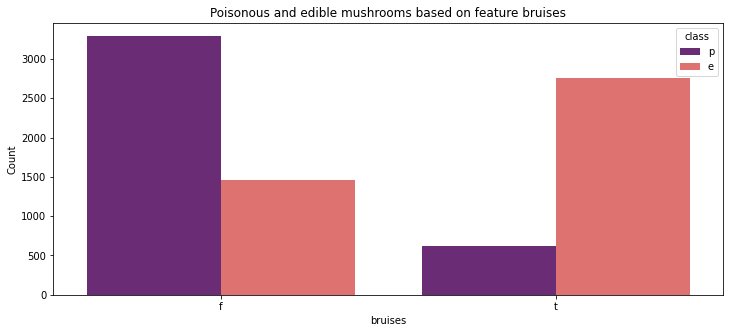

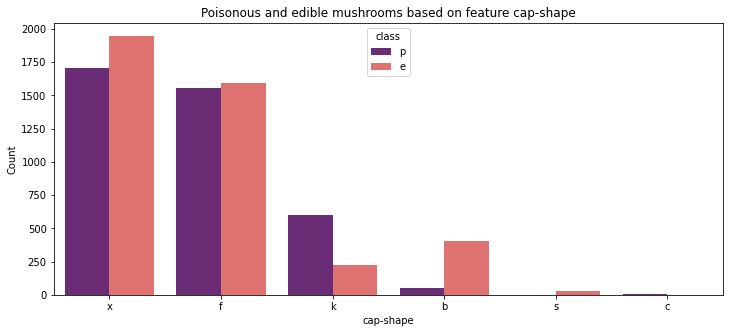

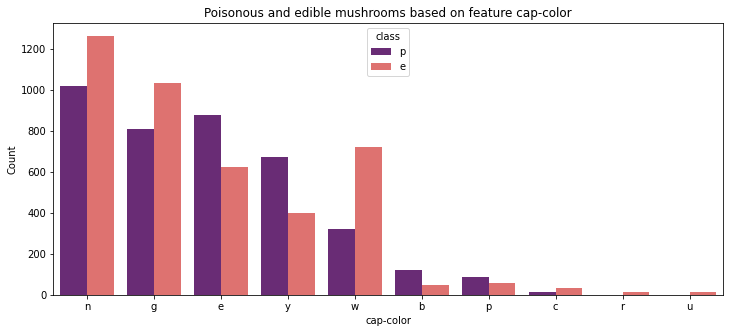

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for feature in ['odor', 'bruises', 'cap-shape', 'cap-color']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x=feature, ax=ax, data=dataframe, hue='class', 
                  order=dataframe[feature].value_counts().index,
                  palette='magma').set_ylabel('Count')
    ax.set_title(f'Poisonous and edible mushrooms based on feature {feature}')
    plt.show()

## Data preprocessing

In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataframe = dataframe.apply(encoder.fit_transform, axis=0)

In [7]:
dataframe.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [8]:
X = dataframe.iloc[:, 1:]
y = dataframe.iloc[:, 0]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train.shape, X_test.shape

((5686, 22), (2438, 22))

## Classification

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = list(map(int, y_pred))

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mse)
print('Root mean squared error:', np.sqrt(mse))

Mean absolute error: 0.0
Mean squared error: 0.0
Root mean squared error: 0.0


In [15]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1272
           1       1.00      1.00      1.00      1166

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [17]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['edible', 'poisonous'])
plt.show()

### Looks like my classifier did a good job!
Let's check, which features had largest impact on prediction.

In [24]:
import matplotlib.pyplot as plt

importances = {col: i for col, i in zip(dataframe.columns[1:], model.feature_importances_)}
importances = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(importances.values()), y=list(importances.keys()))
ax.set_title('Feature importances measured by Gini index')
plt.show()

**As I suspected, odor and bruises had big impact on prediction.**

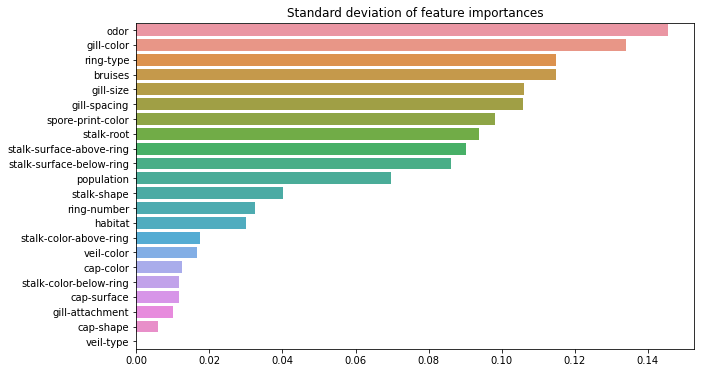

In [23]:
stds = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    
stds = {col: i for col, i in zip(dataframe.columns[1:], stds)}
stds = dict(sorted(stds.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=list(stds.values()), y=list(stds.keys()))
ax.set_title('Standard deviation of feature importances')
plt.show()

**All standard devations are low. Let's look at one of RandomForest esimators.**

In [25]:
from sklearn.tree import export_graphviz

# create a dot file
export_graphviz(model.estimators_[0], out_file='tree.dot', feature_names = dataframe.columns[1:],
                class_names = dataframe.columns[0], rounded = True, proportion = False, 
                precision = 2, filled = True)

# convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# display
from IPython.display import Image
Image(filename = 'tree.png')

## Everything looks perfect, so... Am I overfitting?
Let's train classifier on much smaller dataset.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0)

In [27]:
model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = list(map(int, y_pred))

In [28]:
mse = mean_squared_error(y_test, y_pred)

print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean squared error:', mse)
print('Root mean squared error:', np.sqrt(mse))

Mean absolute error: 0.010365379632029024
Mean squared error: 0.010365379632029024
Root mean squared error: 0.10181050845580246


In [29]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.989634620367971
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4010
           1       0.99      0.99      0.99      3708

    accuracy                           0.99      7718
   macro avg       0.99      0.99      0.99      7718
weighted avg       0.99      0.99      0.99      7718



In [30]:
plot_confusion_matrix(model, X_test, y_test, display_labels= ['edible', 'poisonous'])
plt.show()

#### Even when 95\% of the data was used for testing, classifier achieved almost 99\% accuracy. Of course, there's a chance that previous model was overfitting, but it looks like this classification task is relatively easy. At least, for a RandomForest classifier.